# In this file we are going to use Functional API

In [2]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

In [5]:
unzip_data("10_food_classes_10_percent.zip")

In [6]:
# Walk through 10 percent data directory and list number of files
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ch

In [7]:
# Create training and test directories
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [8]:
# Create data inputs
import tensorflow as tf
IMG_SIZE = (224, 224) # define image size
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical", # what type are the labels?
                                                                            batch_size=32) # batch_size is 32 by default, this is generally a good number
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [9]:
# Check out the class names of our dataset
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [10]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224,224,3), name="Input_layer")

x = base_model(inputs)
print(f"Shape after base_model: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name="Global_Avg_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

outputs = tf.keras.layers.Dense(10, activation="softmax", name="Output_layer")(x)

model_0 = tf.keras.Model(inputs, outputs)

model_0.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.legacy.Adam(),
               metrics=["accuracy"])

history_0 = model_0.fit(train_data_10_percent,
                        epochs=5,
                        steps_per_epoch=len(train_data_10_percent),
                        validation_data=test_data_10_percent,
                        validation_steps=int(0.25 * len(test_data_10_percent)))
                # we are only validating 25% data just for it to be quicker optional

24274472/24274472 [==============================] - 0s 0us/step
Shape after base_model: (None, 7, 7, 1280)
After GlobalAveragePooling2D(): (None, 1280)
Epoch 1/5
24/24 [==============================] - 26s 315ms/step - loss: 1.9108 - accuracy: 0.4173 - val_loss: 1.3296 - val_accuracy: 0.6908
Epoch 2/5
24/24 [==============================] - 4s 141ms/step - loss: 1.1578 - accuracy: 0.7520 - val_loss: 0.9149 - val_accuracy: 0.7944
Epoch 3/5
24/24 [==============================] - 7s 286ms/step - loss: 0.8500 - accuracy: 0.8027 - val_loss: 0.7231 - val_accuracy: 0.8487
Epoch 4/5
24/24 [==============================] - 5s 175ms/step - loss: 0.6946 - accuracy: 0.8413 - val_loss: 0.6259 - val_accuracy: 0.8536
Epoch 5/5
24/24 [==============================] - 5s 209ms/step - loss: 0.5870 - accuracy: 0.8813 - val_loss: 0.5764 - val_accuracy: 0.8586


In [11]:
# evaluate on full test data
model_0.evaluate(test_data_10_percent)

79/79 [==============================] - 7s 82ms/step - loss: 0.5728 - accuracy: 0.8564


[0.5728448033332825, 0.8564000129699707]

In [12]:
# checking layer in base model
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number,layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv
4 stem_bn
5 stem_activation
6 block1a_project_conv
7 block1a_project_bn
8 block1a_project_activation
9 block2a_expand_conv
10 block2a_expand_bn
11 block2a_expand_activation
12 block2a_project_conv
13 block2a_project_bn
14 block2b_expand_conv
15 block2b_expand_bn
16 block2b_expand_activation
17 block2b_project_conv
18 block2b_project_bn
19 block2b_drop
20 block2b_add
21 block3a_expand_conv
22 block3a_expand_bn
23 block3a_expand_activation
24 block3a_project_conv
25 block3a_project_bn
26 block3b_expand_conv
27 block3b_expand_bn
28 block3b_expand_activation
29 block3b_project_conv
30 block3b_project_bn
31 block3b_drop
32 block3b_add
33 block4a_expand_conv
34 block4a_expand_bn
35 block4a_expand_activation
36 block4a_dwconv2
37 block4a_bn
38 block4a_activation
39 block4a_se_squeeze
40 block4a_se_reshape
41 block4a_se_reduce
42 block4a_se_expand
43 block4a_se_excite
44 block4a_project_conv
45 block4a_project_bn
46 block4b_expand_conv
47 block

In [13]:
base_model.summary()

Model: "efficientnetv2-b0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, None, None, 3)        0         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 stem_conv (Conv2D)          (None, None, None, 32)       864       ['normalizatio

In [14]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 Global_Avg_pooling_layer (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 Output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 5932122 (22.63 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 5919312 (22.58 MB)
_________________________________________________________________


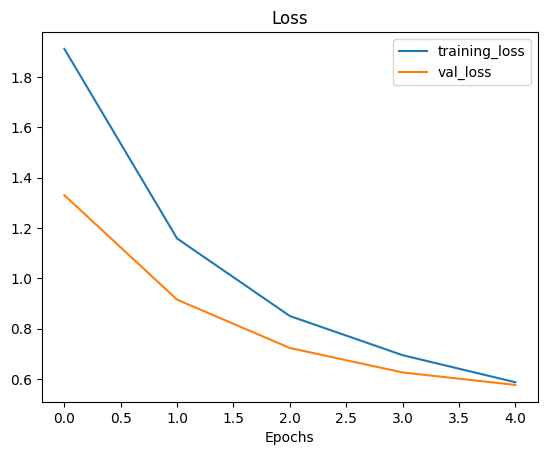

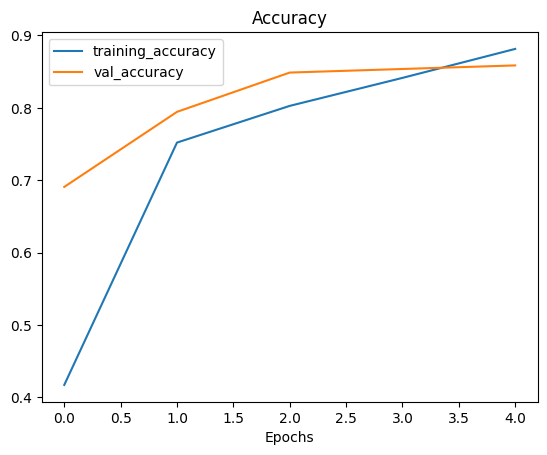

In [15]:
plot_loss_curves(history_0)

In [16]:
# Define input tensor shape (same number of dimensions as the output of efficientnetv2-b0)
input_shape = (1, 4, 4, 3)

# Create a random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor}\n")

# Pass the random tensor through a global average pooling 2D layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor:\n {global_average_pooled_tensor}\n")

# Check the shapes of the different tensors
print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of 2D global averaged pooled input tensor: {global_average_pooled_tensor.shape}")

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338894  0.97772694]
   [ 0.24694404  0.20573746 -0.52562326]
   [ 0.32410017  0.02545409 -0.10638496]
   [-0.63694745  1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815628  0.23479679 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]

2D global average pooled random tensor:
 [[-0.09368646 -0.45840448 -0.2885598 ]]

Shape of input tensor: (1, 4, 4, 3)
Shape of 2D global averaged pooled input tensor: (1, 3)


In [17]:
# lets replicate the GlobalAveragePool2D layer
tf.reduce_mean(input_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

In [18]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2023-11-08 01:22:22--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.117.207, 142.250.99.207, 142.250.107.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.117.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   125MB/s    in 1.0s    

2023-11-08 01:22:23 (125 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [19]:
unzip_data("10_food_classes_1_percent.zip")

In [20]:
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir_1_percent = "10_food_classes_1_percent/test/"

In [21]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'

In [22]:
import tensorflow as tf

Image_size = (224,224)

train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           image_size=Image_size,
                                                                           label_mode="categorical",
                                                                           batch_size=32)

test_data_1_percent= tf.keras.preprocessing.image_dataset_from_directory(test_dir_1_percent,
                                                                           image_size=Image_size,
                                                                           label_mode="categorical")


Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [23]:
# data Augmentation
tf.__version__

'2.14.0'

In [24]:
from tensorflow import keras
from tensorflow.keras import layers

Augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
    # layers.Rescaling(1/255.) to scale image but we dont need it as we are working with efficientNet which is alredy scaled
], name="data_augmentation")

[[[ 38  78 113]
  [ 39  79 114]
  [ 38  78 114]
  ...
  [204 243 238]
  [214 255 247]
  [201 242 234]]

 [[ 36  76 111]
  [ 39  79 114]
  [ 40  80 116]
  ...
  [204 239 233]
  [219 255 249]
  [213 250 242]]

 [[ 33  76 110]
  [ 36  79 113]
  [ 37  80 115]
  ...
  [222 251 246]
  [232 255 254]
  [229 255 251]]

 ...

 [[181 151 149]
  [183 153 151]
  [183 155 152]
  ...
  [178 131 105]
  [179 133 107]
  [179 133 107]]

 [[177 145 146]
  [178 148 148]
  [178 150 149]
  ...
  [176 129 101]
  [177 132 103]
  [176 132 103]]

 [[174 142 143]
  [175 145 145]
  [175 145 145]
  ...
  [172 127  98]
  [170 125  96]
  [167 123  94]]]
tf.Tensor(
[[[[102.05031   68.7035    58.389473]
   [103.92693   70.17235   60.13389 ]
   [104.210014  71.0637    61.115208]
   ...
   [ 26.726591  61.145195 109.89931 ]
   [ 24.785318  58.450947 108.80755 ]
   [ 21.19693   54.189198 106.5239  ]]

  [[100.8769    68.30684   57.718426]
   [102.1508    68.52643   58.963005]
   [102.27093   68.63264   59.643803]
   ...
 

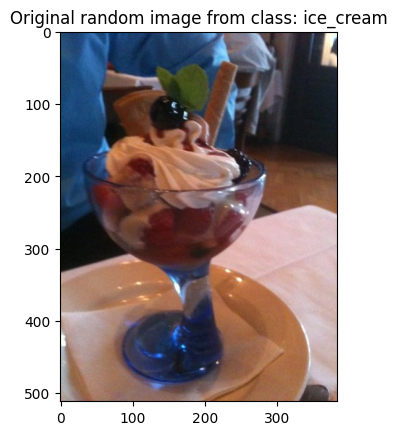

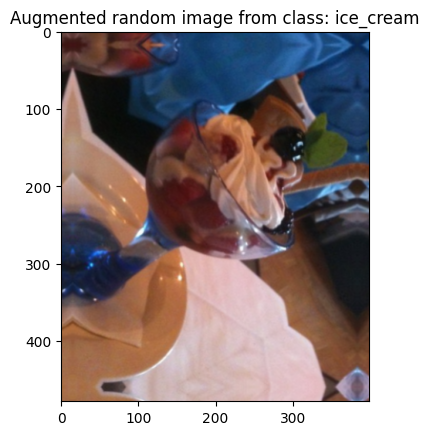

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image

img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original random image from class: {target_class}")
print(img)

# augmented img
augmented_img = Augmentation(tf.expand_dims(img, axis=0))
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.title(f"Augmented random image from class: {target_class}")
print(augmented_img)

In [29]:
# feature extraction 1%
input_shape = (224,224,3)

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name="Input_layer")

# data augmentation

x = Augmentation(inputs)

x = base_model(x, training=False)

x = layers.GlobalAveragePooling2D(name="Global_average_pooling_layer")(x)

outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

model_1 = keras.Model(inputs, outputs)

model_1.compile(loss = "categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1_percent = model_1.fit(train_data_1_percent,
                        epochs=5,
                        steps_per_epoch=len(train_data_1_percent),
                        validation_data=test_data_1_percent,
                        validation_steps=int(0.25 * len(test_data_1_percent)))

Epoch 1/5
3/3 [==============================] - 15s 3s/step - loss: 2.3748 - accuracy: 0.0714 - val_loss: 2.2118 - val_accuracy: 0.1842
Epoch 2/5
3/3 [==============================] - 5s 2s/step - loss: 2.1914 - accuracy: 0.1571 - val_loss: 2.0930 - val_accuracy: 0.2549
Epoch 3/5
3/3 [==============================] - 4s 2s/step - loss: 2.0121 - accuracy: 0.3571 - val_loss: 1.9907 - val_accuracy: 0.3553
Epoch 4/5
3/3 [==============================] - 4s 1s/step - loss: 1.8511 - accuracy: 0.4857 - val_loss: 1.9055 - val_accuracy: 0.3980
Epoch 5/5
3/3 [==============================] - 4s 2s/step - loss: 1.7175 - accuracy: 0.5857 - val_loss: 1.8339 - val_accuracy: 0.4556


In [30]:
result_1_percent_data_aug = model_1.evaluate(test_data_1_percent)
result_1_percent_data_aug

79/79 [==============================] - 8s 91ms/step - loss: 1.8289 - accuracy: 0.4440


[1.8289084434509277, 0.4440000057220459]

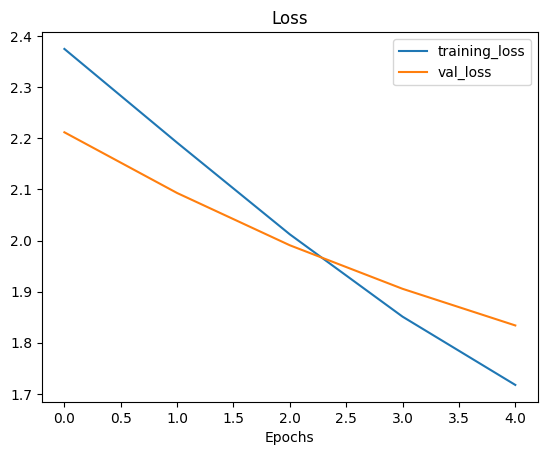

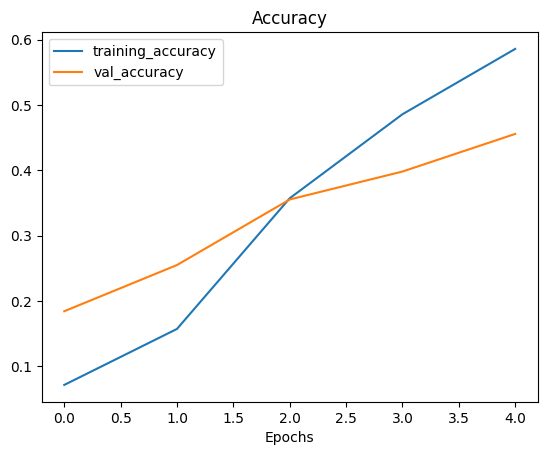

In [31]:
plot_loss_curves(history_1_percent)

In [36]:
# check point path
checkpoint_path = "ten_percent_mdoel_checkpoints_weights/checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         save_freq="epoch",
                                                         verbose=1)

In [37]:
# feature extraction 1%
input_shape = (224,224,3)

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name="Input_layer")

# data augmentation

x = Augmentation(inputs)

x = base_model(x, training=False)

x = layers.GlobalAveragePooling2D(name="Global_average_pooling_layer")(x)

outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

model_10 = keras.Model(inputs, outputs)

model_10.compile(loss = "categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_10_percent = model_10.fit(train_data_10_percent,
                        epochs=5,
                        steps_per_epoch=len(train_data_10_percent),
                        validation_data=test_data_10_percent,
                        validation_steps=int(0.25 * len(test_data_10_percent)),
                        callbacks=[checkpoint_callback])

Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0084 - accuracy: 0.3573
Epoch 1: saving model to ten_percent_mdoel_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 26s 602ms/step - loss: 2.0084 - accuracy: 0.3573 - val_loss: 1.4477 - val_accuracy: 0.6826
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.4046 - accuracy: 0.6440
Epoch 2: saving model to ten_percent_mdoel_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 16s 630ms/step - loss: 1.4046 - accuracy: 0.6440 - val_loss: 1.0354 - val_accuracy: 0.7664
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.1084 - accuracy: 0.7040
Epoch 3: saving model to ten_percent_mdoel_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 14s 553ms/step - loss: 1.1084 - accuracy: 0.7040 - val_loss: 0.8222 - val_accuracy: 0.7961
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 0.9531 - accuracy: 0.

In [38]:
result_10_percent_data_aug = model_10.evaluate(test_data_10_percent)
result_10_percent_data_aug

79/79 [==============================] - 6s 74ms/step - loss: 0.6657 - accuracy: 0.8216


[0.6656520962715149, 0.8216000199317932]

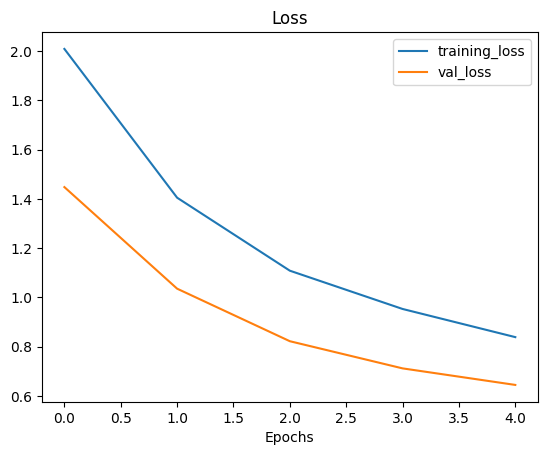

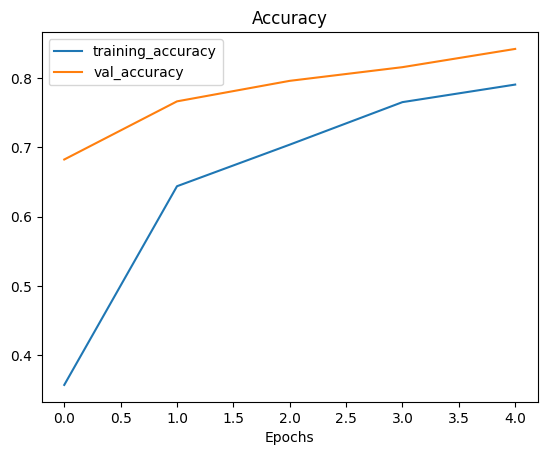

In [39]:
plot_loss_curves(history_10_percent)

In [40]:
def create_base_model(input_shape: tuple[int, int, int] = (224, 224, 3),
                      output_shape: int = 10,
                      learning_rate: float = 0.001,
                      training: bool = False) -> tf.keras.Model:
    """
    Create a model based on EfficientNetV2B0 with built-in data augmentation.

    Parameters:
    - input_shape (tuple): Expected shape of input images. Default is (224, 224, 3).
    - output_shape (int): Number of classes for the output layer. Default is 10.
    - learning_rate (float): Learning rate for the Adam optimizer. Default is 0.001.
    - training (bool): Whether the base model is trainable. Default is False.

    Returns:
    - tf.keras.Model: The compiled model with specified input and output settings.
    """

    # Create base model
    base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
    base_model.trainable = training

    # Setup model input and outputs with data augmentation built-in
    inputs = layers.Input(shape=input_shape, name="input_layer")
    x = Augmentation(inputs)
    x = base_model(x, training=False)  # pass augmented images to base model but keep it in inference mode
    x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
    outputs = layers.Dense(units=output_shape, activation="softmax", name="output_layer")(x)
    model = tf.keras.Model(inputs, outputs)

    # Compile model
    model.compile(loss="categorical_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  metrics=["accuracy"])

    return model

In [ ]:
initial_epochs = 5